### Calcular la Transformada de laplace de la siguiente funciones
- $L\left\lbrace te^{-10t}\right\rbrace$

Utilizando un metodo de integración númerico

Primero se importan las librerias

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import sympy as sp

In [2]:
t = symbols('t')
s = symbols('s')
print("Transformada simbolica")
ft = t * sp.exp(-10 * t)
F = laplace_transform(ft, t, s, noconds=True)
F

Transformada simbolica


(s + 10)**(-2)

In [3]:
def laplace_transform():
    fs = 10 # frecuencia de muestreo (Hz)
    h = 1/fs # periodo de muestreo (seg)
    Nomuestras = 100 # numero de muestras en el tiempo
    freqmax = fs/2 # Hz
    sigm = 1.5 # abcisa de convergencia
    k = 1
    paso = 0.1 # incremento de la variable de Laplace
    ww = 0
    ppe = np.zeros(Nomuestras+1)
    xx = np.zeros(Nomuestras+1)
    Laplacer = np.zeros(int(freqmax/paso)+ Nomuestras)
    Laplacei = np.zeros(int(freqmax/paso)+ Nomuestras)
    for fo in np.arange(-freqmax, freqmax+paso, paso):
        Laplar = 0 # parte real
        Laplai = 0 # parte imaginaria
        for it in range(1, Nomuestras+1):
            i = int(it)
            t = i * h # instante de muestreo
            #pp = lambda i: t
            ppe[i] = t
            xt = t * np.exp(-10 * t) # funcion del tiempo a encontrar su LT
            Laplar = xt*exp(-sigm*t)*np.cos(2*pi*fo*t)*h+Laplar
            Laplai = (-1)*xt*exp(-sigm*t)*np.sin(2*pi*fo*t)*h+Laplai
            #xxi = lambda i: xt # eje de la funcion
            xx[i] = xt
        #Laplacerlam = lambda k: Laplar
        Laplacer[k - 1] = Laplar
        #Laplaceilam = lambda k: Laplai
        Laplacei[k - 1] = Laplai

        ww = 2*pi*fo # eje de frecuencias
        k += 1

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    ax1.plot(ppe, xx)
    ax1.axis([0, 2, -2, 2])
    ax1.set_title('Funcion f(t)')
    p = 1
    print("Parte real")
    print(Laplacer)
    print("Parte imaginaria")
    print(Laplacei)
    sigma = 1.5
    Lainversatr=0;
    Lainversati=0;
    Lainversar = np.zeros(500)
    Lainversai = np.zeros(500)
    tte = np.zeros(500)
    for v in np.arange(-freqmax, freqmax+paso, paso):
        for m in range(1, Nomuestras+2):
            t = m*h
            #tt = lambda m: t
            tte[m - 1] = t
            laplainvr = Laplacer[p - 1]*np.exp(sigma*t)*np.cos(2*np.pi*v*t)*paso
            laplainvr = laplainvr - Laplacei[p - 1]*np.exp(sigma*t)*np.sin(2*np.pi*v*t)*paso
            laplainvi = Laplacei[p - 1]*np.exp(sigma*t)*np.cos(2*np.pi*v*t)*paso
            laplainvi = laplainvi + Laplacer[p - 1]*np.exp(sigma*t)*np.sin(2*np.pi*v*t)*paso
            #Lainversare = lambda m: laplainvr
            #Lainversaim = lambda m: laplainvi
            Lainversar[m - 1] = laplainvr
            Lainversai[m - 1] = laplainvi

        if v == 5:
            # graficar parte real en eje ax2_1
            ax2_1 = ax2.twinx()
            ax2_1.plot(tte, Lainversar, color='red')
            ax2_1.axis([0, 2, -0.1, 0.1])
            ax2_1.set_ylabel('Re[Componente de 5Hz]', color='red')

            # graficar parte imaginaria en eje ax2_2
            ax2_2 = ax2.twinx()
            ax2_2.spines["right"].set_position(("axes", 1.1))
            ax2_2.plot(tte, Lainversai, color='blue')
            ax2_2.axis([0, 2, -0.1, 0.1])
            ax2_2.set_ylabel('Im[Componente de 5Hz]', color='blue')

            # configurar título del eje ax2
            ax2.set_title('Componente de 5Hz')
    
        Lainversatr = Lainversatr + Lainversar
        Lainversati = Lainversati + Lainversai
        p = p + 1
    plt.show()


Resultado:

Parte real
[-1.82654084e-03 -1.82688613e-03 -1.82791517e-03 -1.82960737e-03
 -1.83192774e-03 -1.83482595e-03 -1.83823497e-03 -1.84206921e-03
 -1.84622220e-03 -1.85056370e-03 -1.85493618e-03 -1.85915062e-03
 -1.86298146e-03 -1.86616071e-03 -1.86837093e-03 -1.86923711e-03
 -1.86831715e-03 -1.86509094e-03 -1.85894770e-03 -1.84917160e-03
 -1.83492545e-03 -1.81523241e-03 -1.78895579e-03 -1.75477716e-03
 -1.71117308e-03 -1.65639134e-03 -1.58842787e-03 -1.50500624e-03
 -1.40356243e-03 -1.28123898e-03 -1.13489354e-03 -9.61129116e-04
 -7.56354872e-04 -5.16888350e-04 -2.39111766e-04  8.03043502e-05
  4.44097879e-04  8.54023891e-04  1.31037565e-03  1.81143231e-03
  2.35286875e-03  2.92719024e-03  3.52328464e-03  4.12621140e-03
  4.71735863e-03  5.27508510e-03  5.77591164e-03  6.19623415e-03
  6.51440954e-03  6.71294547e-03  6.78044397e-03  6.71294547e-03
  6.51440954e-03  6.19623415e-03  5.77591164e-03  5.27508510e-03
  4.71735863e-03  4.12621140e-03  3.52328464e-03  2.92719024e-03
  2.35286875e-

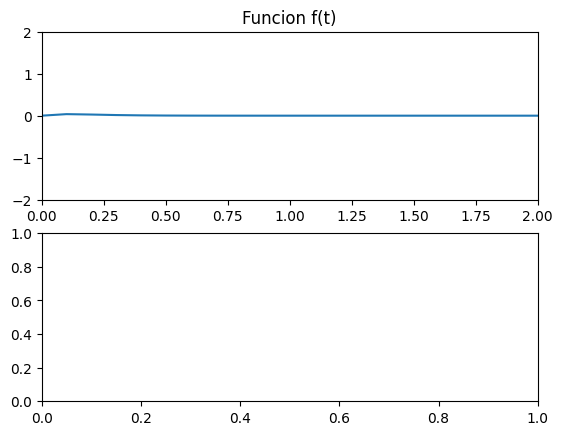

In [4]:

laplace_transform()